1) Importing Libraries

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import kagglehub

2) Getting the Data

In [180]:
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingM

3) Cleaning the Data

In [181]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df.drop('customerID', axis=1, inplace=True)
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


4) Visualising the Data

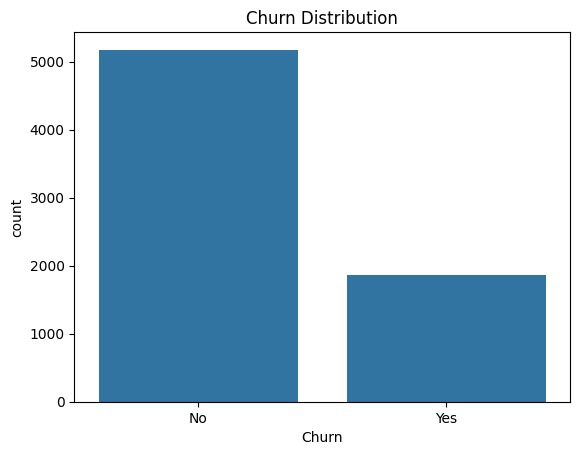

Churn Percentage:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [182]:
plt.figure()
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()
print("Churn Percentage:\n", df['Churn'].value_counts(normalize=True))

Observation: The dataset is slightly imbalanced. Approximately 26% of customers have churned, while the majority remain active. 

5) EDA

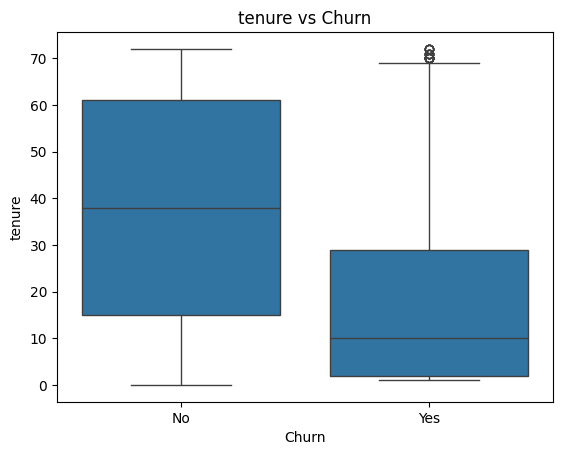

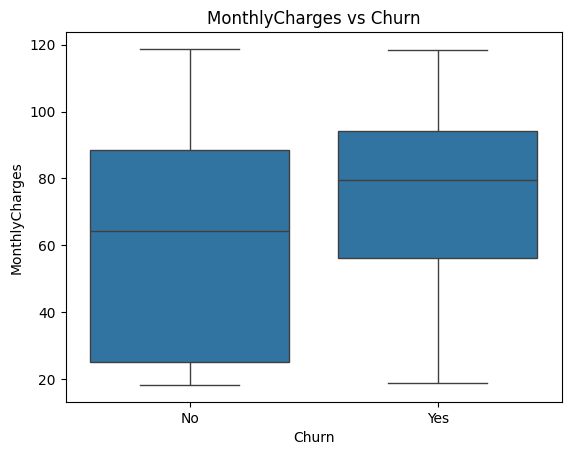

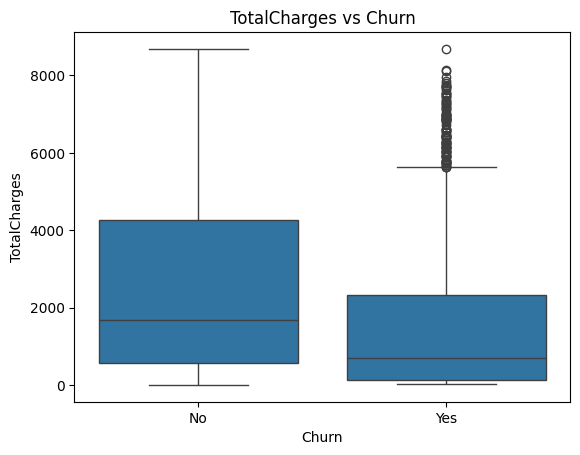

In [183]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    plt.figure()
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()

Observations:
Customers with lower tenure are more likely to churn. This suggests that new customers are at higher risk of leaving, while long-term customers are more stable.
Customers with higher monthly charges tend to churn more frequently. Pricing strategy may influence churn behavior.
Customers who churn generally have lower total charges, likely due to shorter tenure and reduced long-term engagement.

6) Encoding

In [184]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X = pd.get_dummies(X, drop_first=True)
y = y.map({'Yes': 1, 'No': 0})

7) Train-Test Split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

8) Scaling

In [186]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

9) Logistic Regression Model


🔹 Logistic Regression Results
Accuracy: 0.8069552874378992
ROC-AUC: 0.841778397788628
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



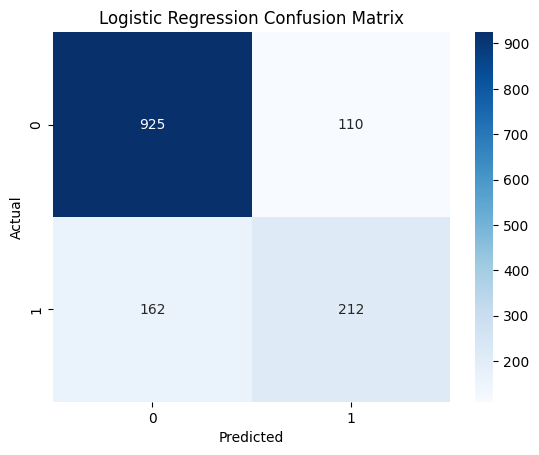

In [187]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]
print("\n🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print(classification_report(y_test, y_pred_lr))
plt.figure()
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

10) Random Forest Model


🔹 Random Forest Results
Accuracy: 0.8055358410220014
ROC-AUC: 0.8435596372936527
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



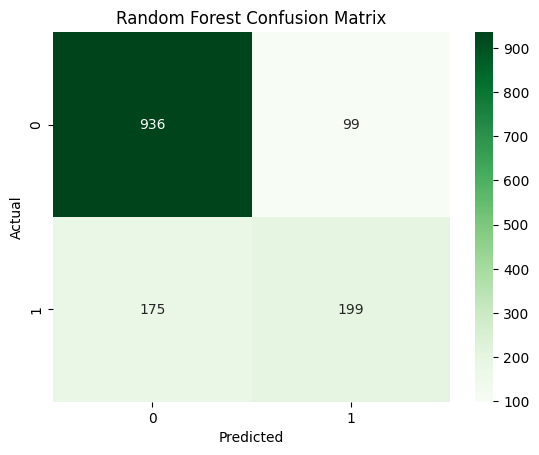

In [188]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
print("\n🔹 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))
plt.figure()
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

11) ROC Curve Comparison

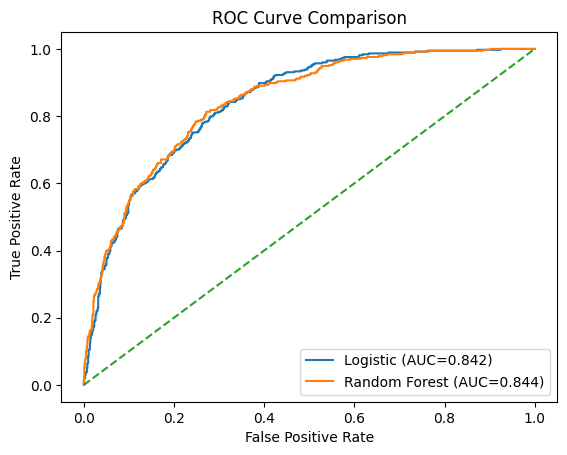

In [189]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"Logistic (AUC={roc_auc_score(y_test, y_prob_lr):.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_score(y_test, y_prob_rf):.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

Observation: Both models perform significantly better than random guessing. Random Forest slightly outperforms Logistic Regression. The improvement is minor.

12) Conclusion

In [190]:
print("FINAL MODEL COMPARISON")
print("Logistic ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

FINAL MODEL COMPARISON
Logistic ROC-AUC: 0.841778397788628
Random Forest ROC-AUC: 0.8435596372936527
